In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import os
os.chdir('E:\\citizen data')

In [9]:
os.chdir("E:\\citizen data")

In [10]:
os.getcwd()

'E:\\citizen data'

In [11]:
payroll = pd.read_csv("data.csv")


C:\py\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
payroll.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [13]:
payroll = payroll[pd.notnull(payroll['Payroll Department'])]
payroll.rename(columns={'Projected Annual Salary' : 'Annual_sal'}, inplace = True)
payroll.rename(columns={'Job Class Title' : 'Job_title'}, inplace = True)
payroll.rename(columns={'Base Pay' : 'Base_Pay'}, inplace = True)

In [14]:
for i in ['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
    payroll[i] = payroll[i].str.replace('$','')

In [15]:
#outlier removal
payroll = payroll[payroll.Annual_sal != 0]  
payroll = payroll[payroll.Base_Pay != 0]
payroll.Annual_sal = payroll.Annual_sal.astype(float)
payroll.Base_Pay = payroll.Base_Pay.astype(float)

C:\py\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


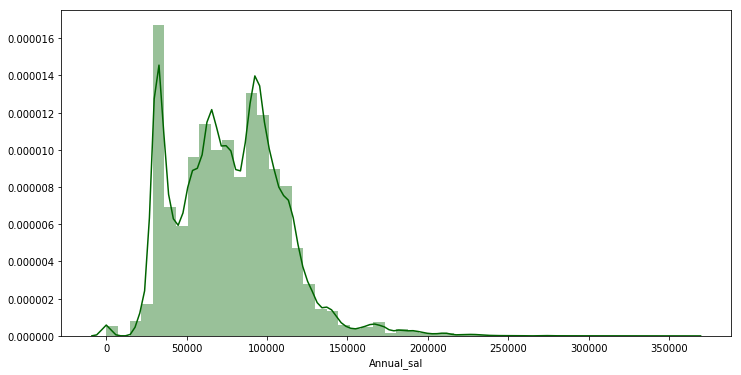

In [16]:
plt.figure(figsize = (12,6))
sns.distplot(payroll.Annual_sal,color = 'darkgreen')

(array([9.2800e+02, 0.0000e+00, 2.5570e+03, 2.9566e+04, 1.3304e+04,
        1.6512e+04, 1.9111e+04, 2.4258e+04, 2.0982e+04, 2.0183e+04,
        2.8931e+04, 1.8363e+04, 1.6039e+04, 7.6590e+03, 3.8470e+03,
        3.1390e+03, 1.0400e+03, 7.2600e+02, 1.3660e+03, 7.9500e+02,
        6.6900e+02, 5.1500e+02, 2.2000e+02, 2.7300e+02, 1.2400e+02,
        1.7500e+02, 4.0000e+01, 2.6000e+01, 2.4000e+01, 4.0000e+00,
        3.4000e+01, 1.4000e+01, 7.0000e+00, 1.7000e+01, 1.0000e+00,
        3.0000e+00, 3.0000e+00, 1.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([     0.   ,   9018.594,  18037.188,  27055.782,  36074.376,
         45092.97 ,  54111.564,  63130.158,  72148.752,  81167.346,
         90185.94 ,  99204.534, 108223.128, 117241.722, 126260.316,
        135278.91 , 144297.504, 153316.098, 162334.692, 171353.286,
        180371.88 , 189390.474, 198409.068, 207427.662, 216446.256,
        225464.85 , 234483.444, 243502.038, 252520.632, 261539.226,
        270557.82 , 279576.414, 288595.008, 29

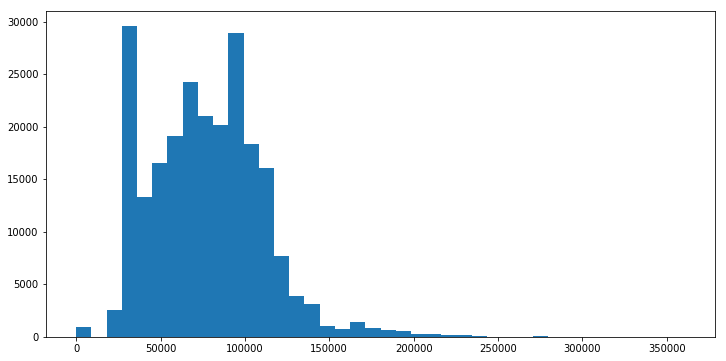

In [20]:
plt.figure(figsize = (12,6))
plt.hist(payroll['Annual_sal'], bins =40)

In [22]:
payroll_2015 = payroll[payroll.Year ==2015]
payroll_2016 = payroll[payroll.Year ==2016]

In [23]:
pop_mean_2015 = payroll_2015['Annual_sal'].mean()
pop_std_2015 = statistics.stdev(payroll_2015.Annual_sal)
print("Population Mean: "+str(pop_mean_2015))
print("Population Standard Deviation: "+str(pop_std_2015))

Population Mean: 76046.39152505301
Population Standard Deviation: 34232.25489729045


In [24]:
print("Population Mean: "+str(payroll_2016['Annual_sal'].mean()))
payroll_2016_sample = payroll_2016.sample(frac=0.10)
sample_mean_2016 = payroll_2016_sample['Annual_sal'].mean()
print("Sample Mean: "+str(sample_mean_2016))
sample_std_2016 = statistics.stdev(payroll_2016_sample.Annual_sal)
print("Sample Standard Deviation: "+str(sample_std_2016))

Population Mean: 78711.19987225177
Sample Mean: 79226.93221414933
Sample Standard Deviation: 33366.568281931766


In [25]:
#Hypothesis Testing
#Normal distribution
#Null Hypothesis : Pay does not increase in 2016
#Alternate Hypothesis: It increases
#Population parameters: Mean = pop_mean_2015, standard deviation = pop_std_2015
#Sample parameters : Mean = sample_mean_2016, standard deviation = sample_std_2016
import math
# Confidence Level 95 %  for one sided Normal curve
zscore_critical = 1.65 
# Calculate the test statistics 
zscore_test_stat = ((sample_mean_2016 - pop_mean_2015)*math.sqrt(8916))/sample_std_2016
print(zscore_test_stat)
#Conclusion: As the test statistics fall into the rejection region the null hypothesis is rejected
#and it can be concluded that the Annual salaries increase in 2016.
#However, we will first check for the Type 1 and Type 2 Errors

9.00066180529398


In [26]:
# we are basically checking the true value of the population characteristics
pop_mean_2016 = payroll_2016['Annual_sal'].mean()
pop_std_2016 = statistics.stdev(payroll_2016.Annual_sal)

zscore_error = ((pop_mean_2016 - pop_mean_2015)/pop_std_2016)
print(zscore_error)

0.07937359898019851


In [27]:
#Type 1 type 2 hypothesis error
#In statistical hypothesis testing, a type I error is the incorrect rejection of a true null hypothesis 
#(a "false positive"), while a type II error is incorrectly retaining a false null hypothesis (a "false negative").
# we are basically checking the true value of the population characteristics
pop_mean_2016 = payroll_2016['Annual_sal'].mean()
pop_std_2016 = statistics.stdev(payroll_2016.Annual_sal)

zscore_error = ((pop_mean_2016 - pop_mean_2015)/pop_std_2016)
print(zscore_error)
#We can clearly see that we encountered a Type 1 error as the population mean is well within acceptable region

0.07937359898019851


In [28]:
#student T-distribution
#Null Hypothesis: pay does not increase in 2016
#Alternate Hypothesis: it increases
#Population parameters: Mean = pop_mean_2015, standard deviation = pop_std_2015
#Sample parameters : Mean = sample_mean_2016, standard deviation = sample_std_2016
#Calculating the Sample Parameters**
payroll_2014 = payroll[payroll.Year ==2014]
payroll_2015 = payroll[payroll.Year ==2015]
# Creating Sample distribution for T statistics
payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)

In [29]:
payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)
N = len(payroll_t_2015_sample)
sample_mean_2015 = payroll_t_2015_sample['Annual_sal'].mean()
sample_std_2015 = statistics.stdev(payroll_t_2015_sample.Annual_sal)
pop_std_2014  = statistics.stdev(payroll_2014.Annual_sal)
pop_mean_2014 = payroll_2014['Annual_sal'].mean()

In [30]:
# Confidence Level 95 %  for one sided T curve
t_critical = 1.311

# Calculate the test statistics 
tscore_test_stat = ((sample_mean_2015 - pop_mean_2014)*math.sqrt(N))/sample_std_2015

#print(tscore_test_stat)
#** F Distribution and ANOVA
#The means from three different samples are compared using ANOVA
#It is similar to applying t-tests over multiple sample ANOVA 

-1.8910621830726315


In [31]:
payroll_2014 = payroll[payroll.Year ==2014]
payroll_2014_elec = payroll_2014[payroll_2014.Job_title == 'Electrician']
payroll_2015_elec = payroll_2015[payroll_2015.Job_title == 'Electrician']
payroll_2016_elec = payroll_2016[payroll_2016.Job_title == 'Electrician']
sample_elec_2014 = payroll_2014_elec.sample(frac=0.47)
sample_elec_mean_2014 = sample_elec_2014['Base_Pay'].mean()
print("Sample Mean 2014 "+str(sample_elec_mean_2014))
sample_elec_2015 = payroll_2015_elec.sample(frac=0.41)
sample_elec_mean_2015 = sample_elec_2015['Base_Pay'].mean()
print("Sample Mean 2015 "+str(sample_elec_mean_2015))
sample_elec_2016 = payroll_2016_elec.sample(frac=0.22)
sample_elec_mean_2016 = sample_elec_2016['Base_Pay'].mean()
print("Sample Mean 2016 "+str(sample_elec_mean_2016))
# Creating the Samples of the base pays over three years
sam_1 = sample_elec_2014.Base_Pay
sam_2 = sample_elec_2015.Base_Pay
sam_3 = sample_elec_2016.Base_Pay

Sample Mean 2014 74036.76828571428
Sample Mean 2015 70767.37828571431
Sample Mean 2016 35123.98742857143


In [32]:
f, p = stats.f_oneway(sam_1, sam_2, sam_3 )
print ('F value:', f)
print ('P value:', p, '\n')
#P value is very low, hence null hypothesis is rejected

F value: 39.58248545774575
P value: 1.891572975078227e-13 



In [33]:
# Transform the qualitative data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words = 'english')
dtm = vect.fit_transform(payroll.Job_title)

In [34]:
from sklearn.cross_validation import train_test_split

X = dtm
y = payroll.Annual_sal

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [35]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
from sklearn.metrics import r2_score, mean_squared_error

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

print('Root mean Score Training: {}'.format(r2_score(y_train, pred_train)))
print('Root mean Score Testing: {}'.format(r2_score(y_test, pred_test)))

Root mean Score Training: 0.9598856037134819
Root mean Score Testing: 0.9582261817995034


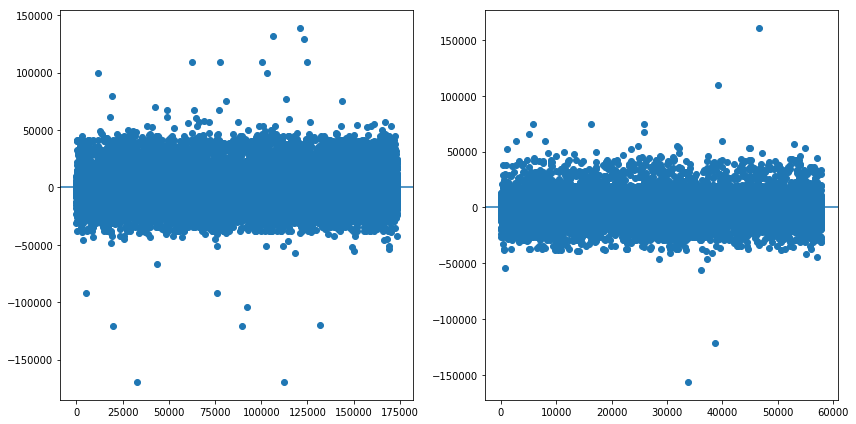

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(len(pred_train)), y_train - pred_train,'o')
plt.axhline(0)
plt.subplot(1,2,2)
plt.plot(np.arange(len(pred_test)), y_test - pred_test,'o')
plt.axhline(0)
plt.tight_layout()